In [46]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [45]:
!pip install scikit-learn==1.4.2

In [47]:
data=pd.read_csv(r'C:\Users\chhav\Downloads\Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,no,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [48]:
data.shape

(4999, 134)

In [49]:
len(data['prognosis'].unique())

42

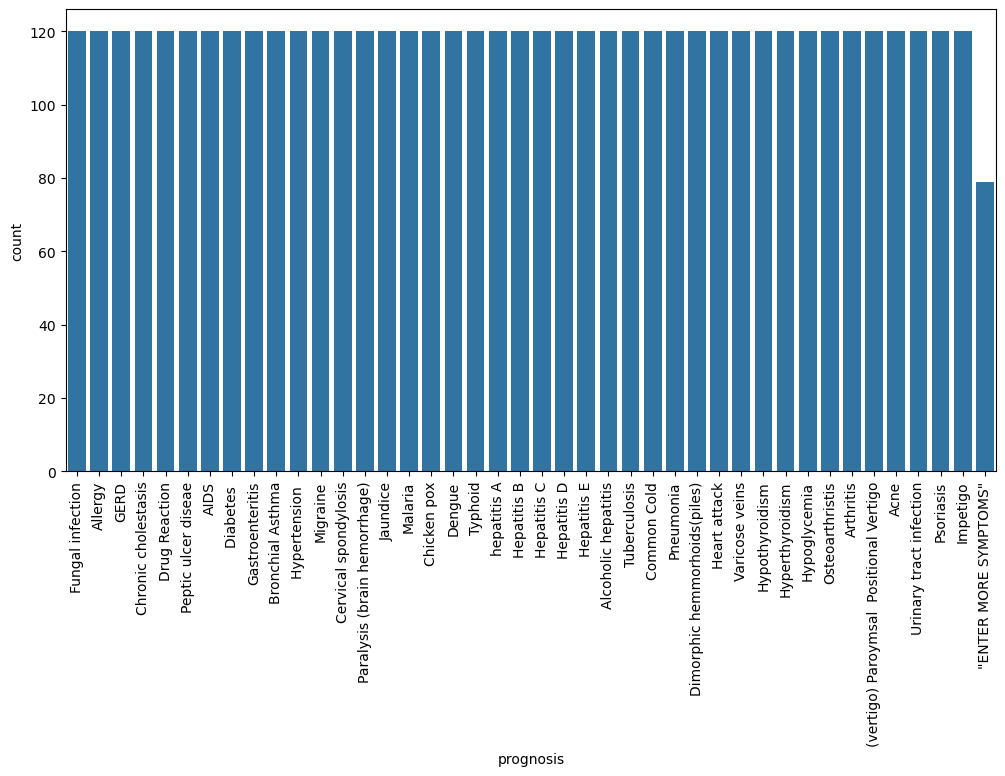

In [50]:
plt.figure(figsize=(12, 6))
base_color = sb.color_palette()[0]
sb.countplot(data=data, x='prognosis', color=base_color)
plt.xticks(rotation=90);

In [51]:
def drop_null_values(data):
    null_col = [col for col in data.columns if data[col].isnull().any()]
    data.drop(null_col, axis=1, inplace=True)
    return data

In [52]:
drop_null_values(data)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,no,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"""ENTER MORE SYMPTOMS"""
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"""ENTER MORE SYMPTOMS"""
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"""ENTER MORE SYMPTOMS"""
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"""ENTER MORE SYMPTOMS"""


In [53]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
no                       int64
prognosis               object
Length: 134, dtype: object

In [54]:
data = data.astype('category')

In [55]:
data.dtypes

itching                 category
skin_rash               category
nodal_skin_eruptions    category
continuous_sneezing     category
shivering               category
                          ...   
blister                 category
red_sore_around_nose    category
yellow_crust_ooze       category
no                      category
prognosis               category
Length: 134, dtype: object

In [56]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [57]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,no
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: category
Categories (42, object): ['"ENTER MORE SYMPTOMS"', '(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', ..., 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

In [60]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gaussian_nb = GaussianNB()
categorical_nb = CategoricalNB()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
bagging = BaggingClassifier()
gradient_boosting = GradientBoostingClassifier()

classifiers = [dt, knn, gaussian_nb, categorical_nb, rf, adaboost, bagging, gradient_boosting]

def train_and_test():
    result = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        score = accuracy_score(y_val, pred)
        result[clf.__class__.__name__] = score
    return result

In [61]:
result = train_and_test()

C:\Users\chhav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [62]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [63]:
y_pred=mlp.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_train)

1.0

In [65]:
def plot_clf(result):
    plt.figure(figsize=(12,6))
    size = np.arange(0, 100+10, 10)
    sb.barplot(x = [v * 100 for v in result.values()] , y=[k for k in result.keys()])
    plt.xticks(size)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifiers');

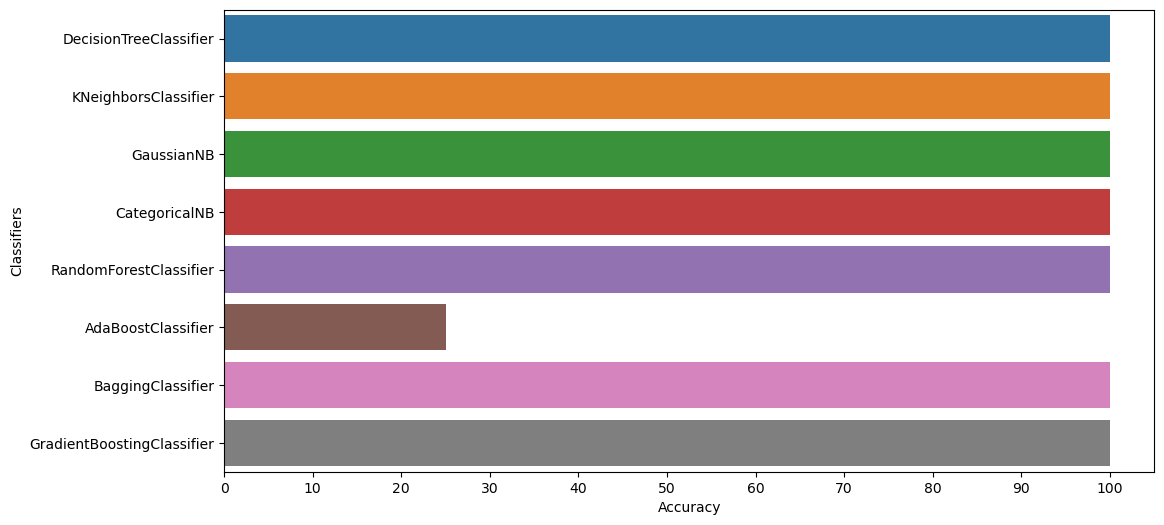

In [66]:
plot_clf(result)

In [67]:
test_data=pd.read_csv(r'C:\Users\chhav\Downloads\Testing.csv')
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [68]:
test_X = test_data.drop('prognosis', axis=1)
test_y = test_data['prognosis']

In [69]:
def clf_report(clf):
    pred = clf.predict(test_X)
    score = classification_report(test_y, pred)
    return score

In [70]:
print("Accuracy Scores:")
for clf_name, score in result.items():
    print(f"{clf_name}: {score}")

Accuracy Scores:
DecisionTreeClassifier: 1.0
KNeighborsClassifier: 1.0
GaussianNB: 1.0
CategoricalNB: 1.0
RandomForestClassifier: 1.0
AdaBoostClassifier: 0.2505
BaggingClassifier: 1.0
GradientBoostingClassifier: 1.0


In [71]:
best_classifier = max(result, key=result.get)
print("Best performing classifier:", best_classifier)

Best performing classifier: DecisionTreeClassifier


In [72]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:

symptoms = list(X.columns)  # List of symptom names

# Prompt the user to enter symptoms
user_input = input("Enter symptoms (separated by commas or spaces): ")

# Split the input into individual symptoms and map to features
user_symptoms = [symptom.strip().lower() for symptom in user_input.split(',')]

# Initialize a dictionary to store the user's symptoms mapped to features
user_symptoms_dict = {symptom: 1 if symptom in user_symptoms else 0 for symptom in symptoms}

# Convert user input to a DataFrame (matching the model's expectations)
user_data = pd.DataFrame([user_symptoms_dict])

# Use the best classifier to predict the disease based on user symptoms
predicted_disease = dt.predict(user_data)
print(predicted_disease)

Enter symptoms (separated by commas or spaces): 
['Chronic cholestasis']


In [74]:
import pandas as pd

# Dummy dataset for home remedy recommendation
remedy_data= {
    'Disease': [
        'Fungal Infection', 'Allergy', 'GERD', 'Chronic Cholestasis', 'Drug Reaction',
        'Peptic Ulcer Disease', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma',
        'Hypertension', 'Migraine', 'Cervical Spondylosis', 'Paralysis', 'Jaundice',
        'Malaria', 'Chickenpox', 'Dengue', 'Typhoid', 'Hepatitis A', 'Hepatitis B',
        'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic Hepatitis', 'Tuberculosis',
        'Common Cold', 'Pneumonia', 'Dimorphic Hemorrhoids', 'Heart Attack', 'Varicose Veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthritis', 'Arthritis',
        'Vertigo', 'Acne', 'Urinary Tract Infection', 'Psoriasis', 'Impetigo'
    ],
    'Remedies': [
        'Dilute a few drops of tea tree oil in a carrier oil and apply it to the affected area.Apply virgin coconut oil to the affected area regularly.Apply plain, unsweetened yogurt to the affected area.Keep affected area dry, Use antifungal creams', 
        'Rinsing your nasal passages with a saline solution can help clear irritants and reduce nasal congestion.Turmeric and ginger have anti-inflammatory properties. Incorporating them into your diet or consuming them as teas may help reduce inflammation.Identify and avoid allergens, Use antihistamines',
        'A small amount of baking soda mixed with water may act as an antacid. Drinking ginger tea may help alleviate GERD symptoms.Drinking a small amount of aloe vera juice may help soothe irritated esophageal tissues.Eat smaller meals, Avoid lying down after meals', 
        'Eat smaller, more frequent meals throughout the day to reduce the workload on the liver.Avoid self-medicating with over-the-counter drugs without professional advice.Maintain a healthy diet, Exercise regularly', 
        'Discontinue the suspected drug. If the reaction involves skin irritation or rash, cool compresses may help soothe the affected area. If the reaction is severe or if you experience symptoms such as difficulty breathing, swelling of the face or throat, chest pain, or other serious symptoms, seek emergency medical attention immediately.',
        'Some studies suggest that cabbage juice may help promote healing of peptic ulcers.Drinking aloe vera juice.Avoid spicy and acidic foods, Take antacids', 
        'Adopt a healthy lifestyle, Follow medical advice.', 
        'Seek medical advise.Engage in regular exercise, such as brisk walking, swimming, or cycling.Choose healthy fats, such as those found in avocados, nuts, seeds, and olive oil.Monitor blood sugar levels, Follow a diabetic diet', 
        'Stay hydrated. Follow the BRAT diet (Bananas, Rice, Applesauce, Toast) to provide easy-to-digest foods that may help firm up stools.Avoid fatty, spicy, and dairy-rich foods until symptoms subside.', 
        'Use inhalers as prescribed, Avoid triggers.Practice deep breathing exercises, such as pursed-lip breathing and diaphragmatic breathing, to improve lung function and reduce shortness of breath.Inhaling steam can help open up airways and relieve congestion. ',
        'Adopt a healthy lifestyle, Take antihypertensive medications.Include potassium-rich foods in your diet, such as bananas, oranges, potatoes, spinach, and tomatoes. Potassium may help balance sodium levels.Foods rich in magnesium, such as leafy green vegetables, nuts, seeds, and whole grains, may have blood pressure-lowering effects.', 
        'Identify and avoid triggers, Take pain relievers.Establish and maintain a regular sleep schedule. Aim for 7-8 hours of quality sleep per night.Apply a cold or warm compress to your head or neck to help alleviate pain and relax tense muscles.', 
        'Practice good posture, Perform neck exercises.Apply heat or cold packs to the affected area to help alleviate pain and reduce inflammation. Experiment with both to see which provides better relief.Engage in regular low-impact exercises, such as walking or swimming, to maintain overall flexibility and strength.', 
        'Seek medical advise. Follow a rehabilitation program, Take medications.', 
        'Seek professional advise. Get plenty of rest, Follow a balanced diet.Drink plenty of water to help flush toxins from the body. Some herbal teas, such as dandelion tea or turmeric tea, are believed by some to have potential benefits for liver health. ',
        'Take antimalarial medications, Get plenty of rest. To prevent further mosquito bites, sleep under a bed net treated with insecticide.', 
        'Take antiviral medications, Use calamine lotion.try to avoid scratching the chickenpox blisters, as this can lead to scarring and increase the risk of bacterial infection.',
        'Keep a close eye on symptoms and seek medical attention immediately if they worsen or if you experience warning signs of severe dengue.Applying cool compresses to the forehead and body can help reduce fever and provide comfort. Do not take aspirin or other blood-thinning medications, as they can increase the risk of bleeding complications.',
        'Stay hydrated, Follow a typhoid diet. Eat a well-balanced and easily digestible diet. This may include soups, broths, boiled vegetables, and small, frequent meals. Wash hands thoroughly with soap and water, and avoid sharing personal items.', 
        'Practice good hygiene, Follow a hepatitis diet.Drink plenty of fluids.Practice good hygiene to prevent the spread of the virus. ', 
        'Follow a hepatitis diet, Seek medical advice.Hepatitis B is preventable with vaccination. If you havenot been vaccinated and are at risk, discuss vaccination with your healthcare provider.Do not share personal items such as razors, toothbrushes, or needles, as these can potentially transmit the virus.',
        'Follow a hepatitis diet, Seek medical advice.consult with your healthcare provider before taking any over-the-counter medications, herbal supplements, or vitamins, as some substances can affect the liver.', 
        'Follow a hepatitis diet, Seek medical advice.Since hepatitis D is dependent on the presence of hepatitis B, it is important to follow the guidelines for managing hepatitis B.', 
        'Follow a hepatitis diet, Seek medical advice.Consume a well-balanced and nutritious diet. Focus on easily digestible foods, including fruits, vegetables, lean proteins, and whole grains. ', 
        'Follow a hepatitis diet, Seek medical advice. The most critical step in managing alcoholic hepatitis is to stop drinking alcohol completely. ', 
        'Follow a tuberculosis treatment plan.During the infectious phase of TB, it is important to follow the guidelines provided by your healthcare provider to prevent the spread of the bacteria to others. This may include isolating yourself during the initial stages of treatment.', 
        'Rest, Stay hydrated, Take over-the-counter cold medications. Applying a warm compress to your forehead and nose can help relieve sinus pressure and ease congestion. Using a saline solution to rinse your nasal passages can help relieve nasal congestion and promote easier breathing. Mixing honey and lemon in warm water or herbal tea can help soothe a sore throat and provide relief from coughing.Gargling with warm salt water can help soothe a sore throat. Mix about half a teaspoon of salt in a glass of warm water and gargle several times a day.', 
        'Take prescribed antibiotics, Get plenty of rest. Applying a warm compress to your chest may help alleviate chest discomfort and ease breathing.\n Using a humidifier in your room can add moisture to the air and help ease congestion and breathing difficulties.', 
        'Maintain good hygiene, Use hemorrhoid creams.Soak in a warm bath to help soothe the affected area and reduce inflammation.Apply a cold compress or ice pack to the affected area to help reduce swelling and numb the pain.Avoid straining during bowel movements to prevent further irritation.', 
        'Seek emergency medical attention.', 
        'Exercise regularly, Wear compression stockings.Some herbal supplements, such as horse chestnut extract, may be suggested by healthcare professionals to help improve symptoms associated with varicose veins. Crossing your legs can restrict blood flow. Sit and stand with good posture to encourage healthy circulation.',
        'Take thyroid medications, Follow a balanced diet.', 
        'Take antithyroid medications, Follow a balanced diet.', 
        'Consume small, frequent meals, Monitor blood sugar levels.If you are experiencing mild hypoglycemia symptoms, consume a fast-acting source of carbohydrates to raise your blood sugar quickly. Examples include:Glucose tablets or gel, Fruit juice (not from concentrate), Regular (non-diet) soda, Hard candies or glucose candies.High amounts of caffeine can contribute to blood sugar fluctuations. Limit your intake of caffeinated beverages.', 
        'Exercise regularly, Maintain a healthy weight.When performing daily activities, use joint protection techniques to reduce strain on the joints. For example, use assistive devices, such as a cane or brace, to support joint function.Applying heat or cold to affected joints can help reduce pain and inflammation. Warm compresses or hot packs can ease stiffness, while cold packs can help numb pain.', 
        'Manage stress, Exercise regularly.\nConsult with a physical therapist who can provide specific exercises and techniques to improve joint function and reduce pain.', 
        'Use treatments.Ginger may help alleviate symptoms. Try ginger tea or chew on a small piece of fresh ginger.', 
        'Moisturize the affected area, Use mild soaps.Use a mild, non-abrasive cleanser to wash your face twice a day.Diluted tea tree oil may have antibacterial properties. Apply sparingly to affected areas.Mix honey and cinnamon to form a paste. Apply as a mask and leave on for 10-15 minutes before rinsing.', 
        'Take medical advise.Some studies suggest that cranberry juice may help prevent UTIs, but it is not a cure. Opt for unsweetened cranberry juice.\nApplying a warm compress to the lower abdomen may provide some relief.', 
        'Apply aloe vera gel, Take pain relievers.Regularly apply moisturizers to keep the skin hydrated. Choose fragrance-free and hypoallergenic options.Soaking in a warm bath can help soften scales and relieve itching. Applying natural oils like coconut oil, olive oil, or tea tree oil may help moisturize the skin and reduce inflammation.', 
        'Consult healthcare expert. Stay hydrated, Rest, Take pain relievers.Change bedding, clothing, and towels regularly to avoid reinfection. Wash these items in hot water.Gently wash the affected areas with mild soap and water to remove crusts and drainage. Use a clean cloth or cotton ball, and avoid scrubbing, as it can worsen the condition.'
    ]
}

dummy_dataset = pd.DataFrame(remedy_data)

# Display the dummy dataset
print(dummy_dataset)


                    Disease                                           Remedies
0          Fungal Infection  Dilute a few drops of tea tree oil in a carrie...
1                   Allergy  Rinsing your nasal passages with a saline solu...
2                      GERD  A small amount of baking soda mixed with water...
3       Chronic Cholestasis  Eat smaller, more frequent meals throughout th...
4             Drug Reaction  Discontinue the suspected drug. If the reactio...
5      Peptic Ulcer Disease  Some studies suggest that cabbage juice may he...
6                      AIDS  Adopt a healthy lifestyle, Follow medical advice.
7                  Diabetes  Seek medical advise.Engage in regular exercise...
8           Gastroenteritis  Stay hydrated. Follow the BRAT diet (Bananas, ...
9          Bronchial Asthma  Use inhalers as prescribed, Avoid triggers.Pra...
10             Hypertension  Adopt a healthy lifestyle, Take antihypertensi...
11                 Migraine  Identify and avoid trig

In [75]:
def suggest_remedies(predicted_disease, dataset):
    # Iterate through all diseases in the dataset
    for index, row in dataset.iterrows():
        if row['Disease'] == predicted_disease:
            return row['Remedies']

In [76]:
suggested_remedies = suggest_remedies(predicted_disease, dummy_dataset)
# Display the results
print(f"Suggested Remedies for {predicted_disease}: {suggested_remedies}")

Suggested Remedies for ['Chronic cholestasis']: None


In [77]:
import pickle
pickle.dump(dt, open('remedy.pkl','wb'))

In [78]:
from joblib import dump, load
dump(dt,'remedy.joblib')

['remedy.joblib']